In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. 准备数据
# 生成一些线性关系的数据：y = 2x + 3 + 噪声
np.random.seed(42)
n_samples = 100
x_np = np.random.randn(n_samples, 1)
y_np = 2 * x_np + 3 + 0.1 * np.random.randn(n_samples, 1)

# 转换为PyTorch张量
x = torch.from_numpy(x_np).float()
y = torch.from_numpy(y_np).float()

In [3]:
# 2. 定义模型参数（需要梯度跟踪）
# 权重和偏置，设置requires_grad=True以启用梯度计算
w = torch.randn(1, requires_grad=True, dtype=torch.float32)  # 权重
b = torch.randn(1, requires_grad=True, dtype=torch.float32)  # 偏置

print(f"初始参数: w = {w.item():.3f}, b = {b.item():.3f}")

初始参数: w = -0.725, b = 1.040


In [4]:
# 3. 定义超参数
learning_rate = 0.01
n_epochs = 1000

# 用于可视化
losses = [





























    
]

In [5]:
# 4. 训练循环
for epoch in range(n_epochs):
    # 前向传播：计算预测值
    y_pred = w * x + b
    
    # 计算损失（均方误差）
    loss = ((y_pred - y) ** 2).mean()
    losses.append(loss.item())
    
    # 反向传播：自动计算梯度
    # PyTorch会自动计算loss相对于所有requires_grad=True的张量的梯度
    loss.backward()
    
    # 手动更新参数（不使用优化器，以便更清楚地展示过程）
    # 注意：在更新参数时，我们需要关闭梯度跟踪
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        
        # 清零梯度（重要！否则梯度会累加）
        w.grad.zero_()
        b.grad.zero_()
    
    # 每100轮打印一次损失
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.3911
Epoch [200/1000], Loss: 0.0252
Epoch [300/1000], Loss: 0.0095
Epoch [400/1000], Loss: 0.0089
Epoch [500/1000], Loss: 0.0088
Epoch [600/1000], Loss: 0.0088
Epoch [700/1000], Loss: 0.0088
Epoch [800/1000], Loss: 0.0088
Epoch [900/1000], Loss: 0.0088
Epoch [1000/1000], Loss: 0.0088


In [6]:
# 5. 输出最终参数
print(f"\n训练完成!")
print(f"最终参数: w = {w.item():.4f}, b = {b.item():.4f}")
print(f"真实参数: w = 2.0, b = 3.0")


训练完成!
最终参数: w = 1.9857, b = 3.0007
真实参数: w = 2.0, b = 3.0


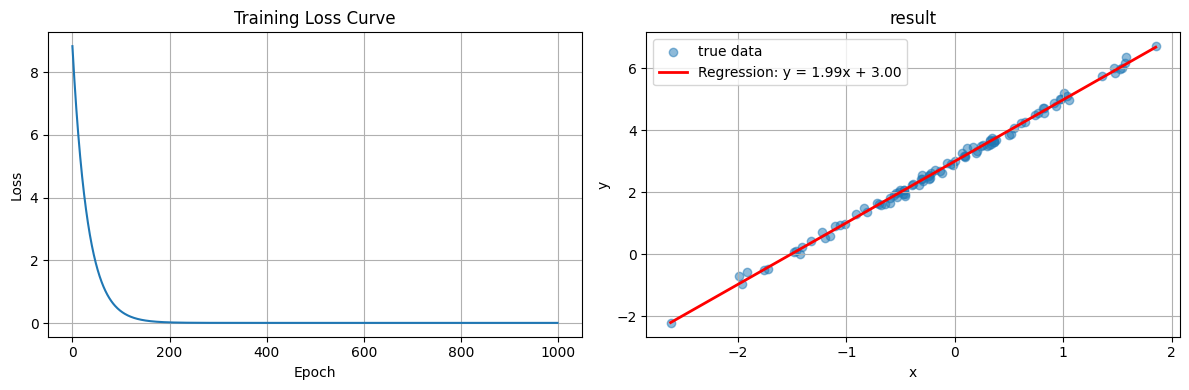

In [7]:
# 6. 可视化结果
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 左侧：损失曲线
axes[0].plot(losses)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss Curve')
axes[0].grid(True)

# 右侧：拟合结果
axes[1].scatter(x_np, y_np, alpha=0.5, label='true data')
# 生成预测线
x_range = torch.linspace(x.min(), x.max(), 100)
y_range = w.detach().numpy() * x_range.numpy() + b.detach().numpy()
axes[1].plot(x_range.numpy(), y_range, 'r-', linewidth=2, label=f'Regression: y = {w.item():.2f}x + {b.item():.2f}')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('result')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



In [8]:
# 7. 使用模型进行预测
print("\n预测示例:")
test_x = torch.tensor([-1.0, 0.0, 1.0, 2.0])
with torch.no_grad():  # 预测时不需要梯度
    predictions = w * test_x + b
    print(f"输入 x: {test_x.numpy()}")
    print(f"预测 y: {predictions.numpy()}")


预测示例:
输入 x: [-1.  0.  1.  2.]
预测 y: [1.0150665 3.0007365 4.9864063 6.9720764]
